# ANOVA

## Libraries and settings

In [61]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Settings for seaborn
sns.set_theme(style="ticks", palette="pastel")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print('Current working directory:', os.getcwd())

Current working directory: /Users/bastian/vs_code/wine_analysis/notebooks


### Importing wine data

In [62]:
# Read and select variables
df_orig = pd.read_csv("../data/enriched/wines_with_abv.csv")[['web-scraper-order',
                                                        'name',
                                                        'price',
                                                        'country',
                                                        'quantity',
                                                        'value',
                                                        'bio', 
                                                        'non_alcoholic', 
                                                        'premium', 
                                                        'wine_category', 
                                                        'price_category',
                                                        'price_per_10cl',
                                                        'quantity_in_cl',
                                                        'country_code',
                                                        'ABV',
                                                        ]]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

# Rename variable 'web-scraper-order' to 'wine_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'wine_id'})


### One-way ANOVA test price_per_10cl

In [63]:
# Example: Group data by 'wine_category' and analyze 'price_per_10cl'
dependent_var = 'price_per_10cl'  # Replace with the variable you want to analyze
independent_var = 'wine_category'

# Check groups
groups = [group[dependent_var].values for name, group in df_orig.groupby(independent_var)]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("No significant difference between the groups.")

F-statistic: 6.486736193729932
P-value: 5.143536203257175e-05
There is a significant difference between the groups.


### Tukey HSD Post-Hoc Test

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
     GLÜHWEIN       ROTWEIN    0.815 0.0414  0.0201 1.6099   True
     GLÜHWEIN    SCHAUMWEIN   0.9686 0.0015  0.2747 1.6624   True
     GLÜHWEIN UNCATEGORIZED   1.3433    0.0  0.5939 2.0928   True
     GLÜHWEIN     WEISSWEIN     1.12 0.0013  0.3251 1.9149   True
      ROTWEIN    SCHAUMWEIN   0.1536 0.9274 -0.3668  0.674  False
      ROTWEIN UNCATEGORIZED   0.5283 0.1058 -0.0642 1.1208  False
      ROTWEIN     WEISSWEIN    0.305 0.6977 -0.3441 0.9541  False
   SCHAUMWEIN UNCATEGORIZED   0.3748 0.1489 -0.0731 0.8227  False
   SCHAUMWEIN     WEISSWEIN   0.1514 0.9308  -0.369 0.6718  False
UNCATEGORIZED     WEISSWEIN  -0.2233 0.8392 -0.8158 0.3692  False
-----------------------------------------------------------------


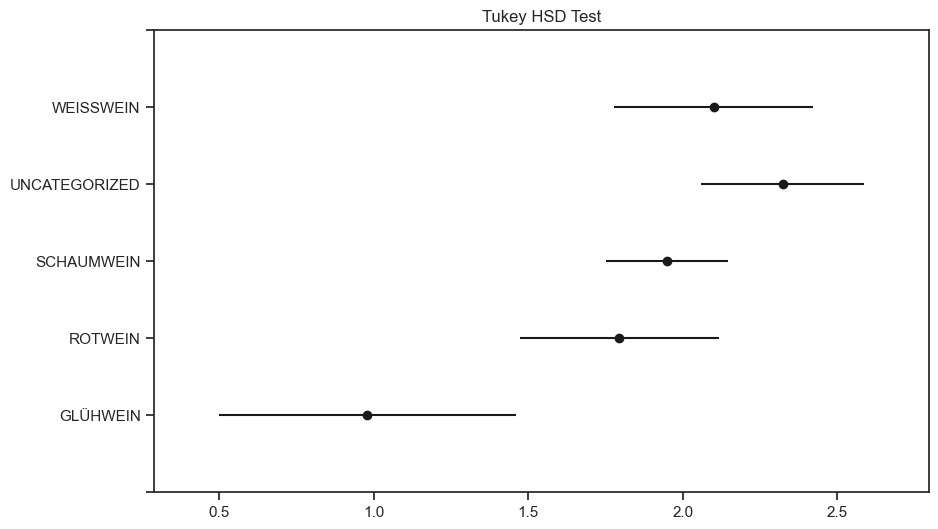

In [64]:
# Perform Tukey HSD test
tukey = pairwise_tukeyhsd(endog=df_orig[dependent_var], groups=df_orig[independent_var], alpha=0.05)

# Print Tukey HSD results
print(tukey)

# Plot the results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test')
plt.show()

ANOVA: There is a significant difference in price_per_10cl between wine categories (p < 0.05).

Tukey HSD: Glühwein significantly differs from other wine types in price_per_10cl. Others show no major differences.

### One-way ANOVA test ABV

In [65]:
# Example: Group data by 'wine_category' and analyze 'ABV'
dependent_var = 'ABV'  # Replace with the new variable you want to analyze
independent_var = 'wine_category'

# Check groups
groups = [group[dependent_var].values for name, group in df_orig.groupby(independent_var)]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference between the groups for ABV.")
else:
    print("No significant difference between the groups for ABV.")


F-statistic: 31.601781170483456
P-value: 6.46828435575641e-22
There is a significant difference between the groups for ABV.


There is a significant difference in ABV among the wine categories. This means at least one wine category differs significantly in its alcohol content (ABV) compared to others.


### Tukey HSD Post-Hoc Test

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
     GLÜHWEIN       ROTWEIN     -4.0    0.0 -5.6934 -2.3066   True
     GLÜHWEIN    SCHAUMWEIN  -2.1429 0.0008 -3.6209 -0.6648   True
     GLÜHWEIN UNCATEGORIZED      0.0    1.0 -1.5965  1.5965  False
     GLÜHWEIN     WEISSWEIN     -4.0    0.0 -5.6934 -2.3066   True
      ROTWEIN    SCHAUMWEIN   1.8571 0.0001  0.7486  2.9657   True
      ROTWEIN UNCATEGORIZED      4.0    0.0  2.7378  5.2622   True
      ROTWEIN     WEISSWEIN      0.0    1.0 -1.3826  1.3826  False
   SCHAUMWEIN UNCATEGORIZED   2.1429    0.0  1.1888   3.097   True
   SCHAUMWEIN     WEISSWEIN  -1.8571 0.0001 -2.9657 -0.7486   True
UNCATEGORIZED     WEISSWEIN     -4.0    0.0 -5.2622 -2.7378   True
------------------------------------------------------------------


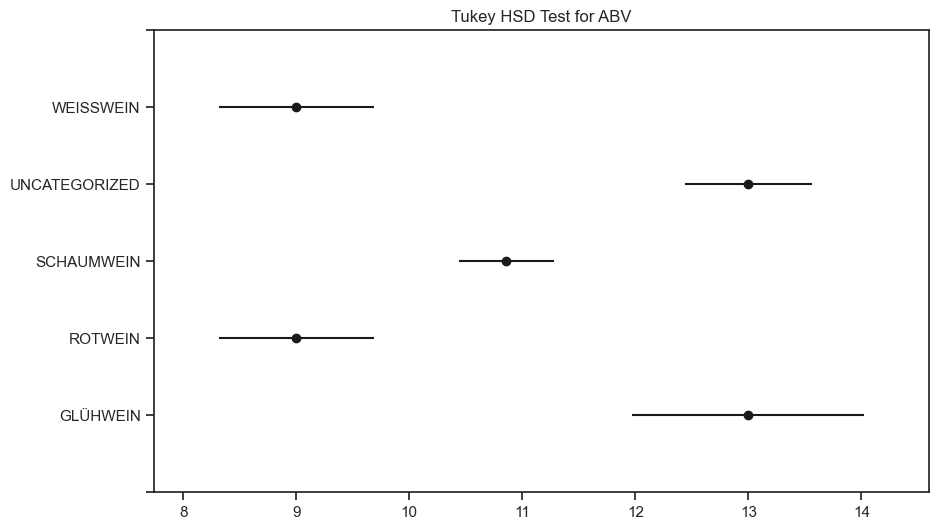

In [66]:
# Perform Tukey HSD test
tukey = pairwise_tukeyhsd(endog=df_orig[dependent_var], groups=df_orig[independent_var], alpha=0.05)

# Print Tukey HSD results
print(tukey)

# Plot the results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for ABV')
plt.show()


Glühwein differs significantly from all other categories (Rotwein, Schaumwein, Uncategorized, and Weisswein).
Rotwein significantly differs from Schaumwein and Uncategorized.
Schaumwein significantly differs from Weisswein and Uncategorized.